## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
merged_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# print(mouse_metadata.count())
# print(study_results.count())

# Display the data table for preview
merged_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_ids = merged_study_df["Mouse ID"].unique()
print(f"Number of mice: {len(mouse_ids)}")

# Array of all unique Mouse IDs:
# mouse_ids

Number of mice: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates_id_time = merged_study_df[merged_study_df.duplicated(["Timepoint", "Mouse ID"], keep=False)]
duplicate_ids = duplicates_id_time["Mouse ID"].unique()
print(f"Mouse IDs with duplicate records: {duplicate_ids}")

print(f"Duplicate records showing up for Mouse ID and Timepoint: ")
duplicates_id_time

Mouse IDs with duplicate records: ['g989']
Duplicate records showing up for Mouse ID and Timepoint: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
print(f"All data for the Mouse ID with duplicate records: ")
duplicate_mouse = merged_study_df.loc[merged_study_df["Mouse ID"] == "g989"]
duplicate_mouse

# duplicate_mouse.count()

All data for the Mouse ID with duplicate records: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = merged_study_df[merged_study_df["Mouse ID"] != "g989"]
clean_study_df

# drug_study_data.loc[907:921]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_study_count = clean_study_df["Mouse ID"].nunique()
clean_study_count
# Number of mice dropped from 249 to 248 confirming all data for duplicate Mouse ID was removed

248

## Summary Statistics

In [8]:
# Generate a summary statistics table with the 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
df_groupby_drug = clean_study_df.groupby(["Drug Regimen"])

# Calculate tumor volume mean for each drug regimen
tvolume_mean = df_groupby_drug["Tumor Volume (mm3)"].mean()
# Calculate tumor volume median for each drug regimen
tvolume_median = df_groupby_drug["Tumor Volume (mm3)"].median()
# Calculate tumor volume variance for each drug regimen
tvolume_variance = df_groupby_drug["Tumor Volume (mm3)"].var()
# Calculate tumor volume standard deviation for each drug regimen
tvolume_stdev = df_groupby_drug["Tumor Volume (mm3)"].std()
# Calculate tumor volume SEM for each drug regimen
tvolume_sem = df_groupby_drug["Tumor Volume (mm3)"].sem()

# df_groupby_drug.count()

In [10]:
# Assemble the resulting series into a single summary dataframe.
tumor_volume_stats = pd.DataFrame({
    "Tumor Volume Mean": tvolume_mean,
    "Tumor Volume Median": tvolume_median,
    "Tumor Volume Variance": tvolume_variance,
    "Tumor Volume Standard Deviation": tvolume_stdev,
    "Tumor Volume SEM": tvolume_sem
})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg_stats = df_groupby_drug.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
tumor_agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# clean_study_df

In [13]:
# Find total number of measurements taken on each Drug Regimen
total_measures = clean_study_df[["Drug Regimen", "Timepoint"]].groupby(["Drug Regimen"])
total_measures_sorted = total_measures["Drug Regimen"].count().sort_values(ascending=False)
total_measures_sorted

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

### Pandas Bar Plot

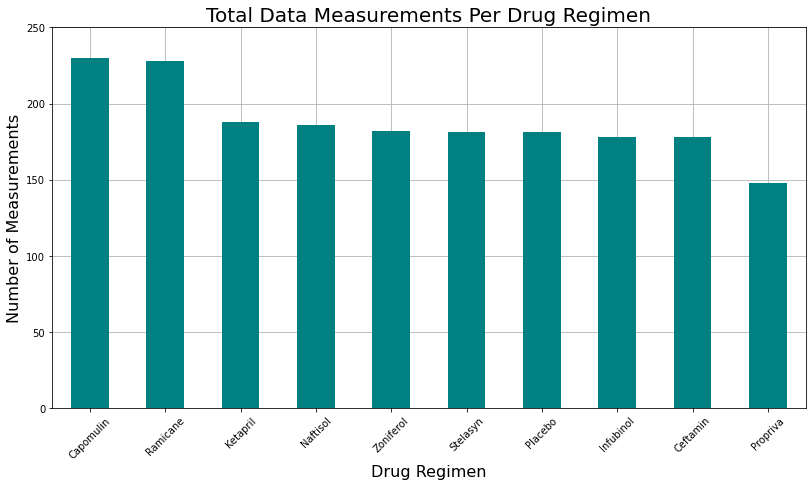

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measures_plot = total_measures_sorted.plot(kind='bar', figsize=(13.5,7), align="center", rot=45, color="teal", \
                                                 grid=True, zorder=3)

# Label and format
total_measures_plot.set_title("Total Data Measurements Per Drug Regimen", fontsize=20)
total_measures_plot.set_xlabel("Drug Regimen", fontsize=16)
total_measures_plot.set_ylabel("Number of Measurements", fontsize=16)
plt.ylim(0,(max(total_measures_sorted)+20))

plt.show()

### Matplotlib Bar Plot

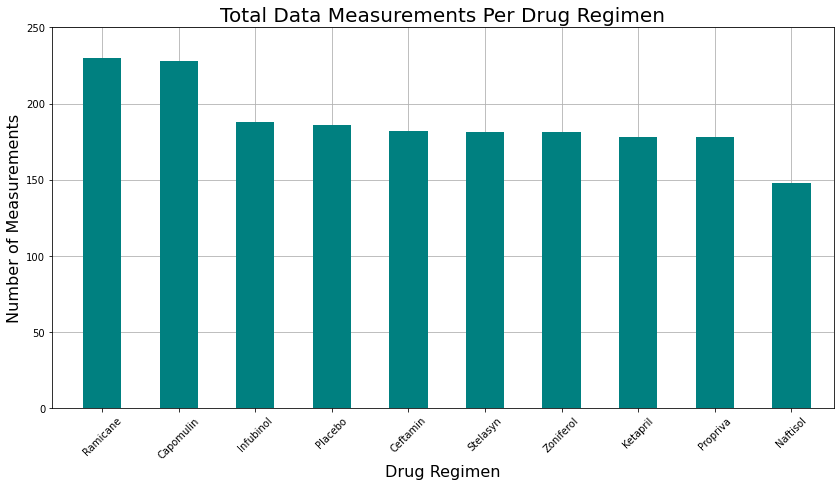

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Size the plot first
plt.rcParams["figure.figsize"]=(14,7)

x_axis = np.arange(len(total_measures_sorted))
total_measures_plt = plt.bar(x_axis, total_measures_sorted, align="center", color="teal", zorder=3, width=0.5)

# Set tick locations
drug_list = clean_study_df["Drug Regimen"].unique()
# drug_list
tick_locations = [drug for drug in x_axis]
plt.xticks(tick_locations, drug_list, rotation=45, size=10)

# Label and format
plt.title("Total Data Measurements Per Drug Regimen", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Number of Measurements", fontsize=16)

plt.xlim(-.65, len(x_axis)-0.45)
plt.ylim(0, max(total_measures_sorted)+20)
plt.grid(zorder=0)
plt.show()

In [16]:
# Already found the number of unique mice earlier based on cleaned DafaFrame we can use here
# print(f"Total mice: {clean_study_count}")

# Number and percent of male mice
male_mice = clean_study_df.loc[clean_study_df["Sex"] == "Male"].nunique().iloc[0]
# print(f"Male mice: {male_mice}")
males_pct = (male_mice / clean_study_count)*100
# print(males_pct)

# Number and percent of female mice
female_mice = clean_study_df.loc[clean_study_df["Sex"] == "Female"].nunique().iloc[0]
# print(f"Female mice: {female_mice}")
females_pct = (female_mice / clean_study_count)*100
# print(females_pct)

In [17]:
# Create a dataframe to hold mice gender distribution
gender_df = pd.DataFrame({
    "Gender Distribution":[males_pct, females_pct]},
    index = ["Male", "Female"])
gender_df

,Gender Distribution
Male,50.403226
Female,49.596774


### Pandas Pie Plot

<AxesSubplot:title={'center':'Distribution of Male and Female Mice'}>

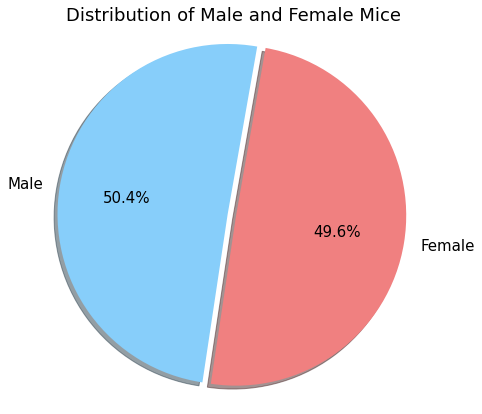

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["lightskyblue", "lightcoral"]
explode = (0.025,0.025)
figsize=(7,7)

gender_plot = gender_df.plot.pie(y="Gender Distribution", figsize=figsize, colors=colors, explode=explode,
                                 shadow=True, startangle=80, autopct="%1.1f%%", fontsize=15, legend=False)

# Label and format
gender_plot.set_title("Distribution of Male and Female Mice", fontsize=18)
gender_plot.set_xlabel("")
gender_plot.set_ylabel("")
plt.axis("equal")
gender_plot

### Pyplot Pie Plot

([<matplotlib.patches.Wedge at 0x1e795a69430>,
 [Text(-1.1102944521804181, 0.18130424555808178, 'Male'),
  Text(1.1102944521804183, -0.18130424555808045, 'Female')],
 [Text(-0.6168302512113434, 0.10072458086560099, '50.4%'),
  Text(0.6168302512113435, -0.10072458086560024, '49.6%')])

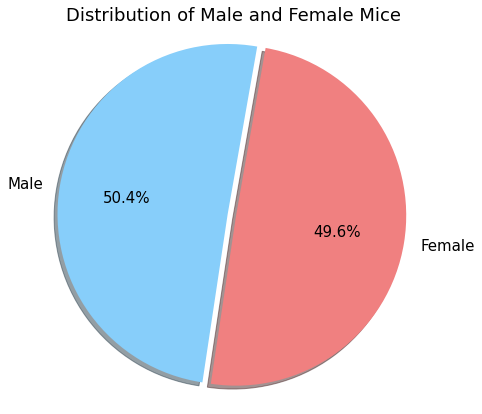

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Size the plot first
plt.rcParams["figure.figsize"]=(7,7)
plt.rcParams["font.size"]=(15)

gender_pcts = gender_df["Gender Distribution"]
# gender_pcts
labels = ["Male", "Female"]
gender_plt = plt.pie(gender_pcts, colors=colors, explode=explode, labels=labels, 
                     shadow=True, startangle=80, autopct="%1.1f%%")

plt.title("Distribution of Male and Female Mice", )

plt.axis("equal")

gender_plt

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
promising_drugs = clean_study_df.loc[clean_study_df["Drug Regimen"].isin(treatments)]
promising_drugs_trimmed = promising_drugs[["Mouse ID", "Drug Regimen", "Timepoint", "Sex"]]
# promising_drugs_trimmed["Drug Regimen"].value_counts()
# promising_drugs_trimmed["Mouse ID"].nunique()
promising_drugs
promising_drugs_trimmed

,Mouse ID,Drug Regimen,Timepoint,Sex
0,k403,Ramicane,0,Male
1,k403,Ramicane,5,Male
2,k403,Ramicane,10,Male
3,k403,Ramicane,15,Male
4,k403,Ramicane,20,Male
...,...,...,...,...
1868,z581,Infubinol,25,Female
1869,z581,Infubinol,30,Female
1870,z581,Infubinol,35,Female
1871,z581,Infubinol,40,Female


In [21]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_study_df.groupby("Mouse ID").max("Timepoint")
last_timepoints

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a203,20,23,45,67.973419,2
a251,21,25,45,65.525743,1
a262,17,29,45,70.717621,4
a275,20,28,45,62.999356,3
a366,16,29,30,63.440686,1
...,...,...,...,...,...
z435,12,26,10,48.710661,0
z578,11,16,45,45.000000,0
z581,24,25,45,62.754451,3


In [22]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Inner join is default, no need to specify
promising_tvolumes_last = last_timepoints.merge(promising_drugs_trimmed, on=["Mouse ID","Timepoint"])
promising_tvolumes_last

,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex
0,a203,20,23,45,67.973419,2,Infubinol,Female
1,a251,21,25,45,65.525743,1,Infubinol,Female
2,a275,20,28,45,62.999356,3,Ceftamin,Female
3,a411,3,22,45,45.466677,1,Ramicane,Male
4,a444,10,25,45,45.000000,0,Ramicane,Female
...,...,...,...,...,...,...,...,...
95,y769,6,27,45,68.594745,4,Ceftamin,Female
96,y793,17,17,45,45.000000,2,Capomulin,Male
97,y865,23,26,45,64.729837,3,Ceftamin,Male
98,z578,11,16,45,45.000000,0,Ramicane,Male


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
# Treatments put into a list above
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
